In [2]:
import pandas as pd
df_apl_et_pauvrete = pd.read_csv("../../data/preprocessed/apl-et-pauvrete/apl_et_pauvrete.csv",sep=";")
df_apl_et_pauvrete

,code,libelle,apl_generaliste,taux_pauvrete
0,01004,Ambérieu-en-Bugey,3.0,11.1
1,01033,Valserhône,1.8,13.0
2,01034,Belley,3.3,12.5
3,01072,Ceyzériat,3.0,7.4
4,01093,Châtillon-sur-Chalaronne,2.0,8.0
...,...,...,...,...
1414,97225,Saint-Pierre,2.7,31.5
1415,97228,Sainte-Marie,3.5,34.0
1416,97404,L'Étang-Salé,3.7,27.3
1417,97414,Saint-Leu,5.0,43.3


In [7]:
departements_haut_de_france = ['02', '60', '80', '59', '62']
df_hautsdefrance = df_apl_et_pauvrete[df_apl_et_pauvrete['code'].str[:2].isin(departements_haut_de_france)]
df_hautsdefrance[["taux_pauvrete", "apl_generaliste"]].describe()

,taux_pauvrete,apl_generaliste
count,96.000000,96.000000
mean,14.367708,3.311458
std,5.196527,0.823327
min,5.500000,1.100000
25%,9.975000,2.800000
50%,13.950000,3.200000
75%,17.425000,3.800000
max,31.600000,5.400000


In [8]:
df_filtered = df_hautsdefrance[
    (df_hautsdefrance["apl_generaliste"] >= 1) &
    (df_hautsdefrance["apl_generaliste"] <= 6) &
    (df_hautsdefrance["taux_pauvrete"] >= 5) &
    (df_hautsdefrance["taux_pauvrete"] <= 30)
]


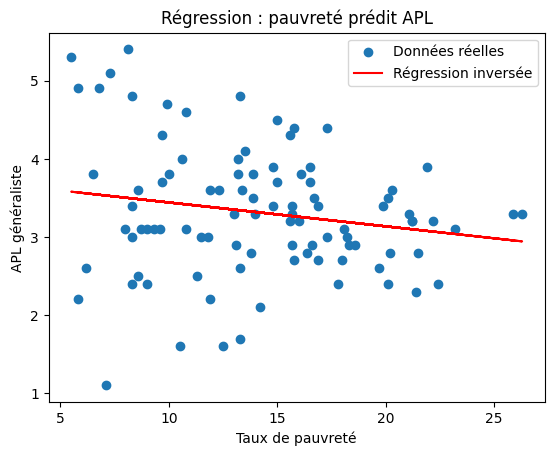

Coefficient (pente) : -0.030570983383298632
Intercept : 3.7473738347965426
Score R² : 0.0328987638488496


In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df_filtered[["taux_pauvrete"]]
y = df_filtered["apl_generaliste"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, label="Données réelles")
plt.plot(X, y_pred, color="red", label="Régression inversée")
plt.xlabel("Taux de pauvreté")
plt.ylabel("APL généraliste")
plt.title("Régression : pauvreté prédit APL")
plt.legend()
plt.show()

print("Coefficient (pente) :", model.coef_[0])
print("Intercept :", model.intercept_)
print("Score R² :", model.score(X, y))


### 🔍 Bilan de l’analyse pauvreté / accessibilité aux soins

Nous avons testé s’il existait une relation entre le **taux de pauvreté** et l’**accessibilité aux soins** (APL) dans les **Hauts-de-France**, en utilisant une régression linéaire simple.

Les résultats sont les suivants :

* **Pente** : -0.0306
* **R²** : 0.033

➡️ Le taux de pauvreté **explique très peu** la variation de l’APL (à peine 3 %).
Cela montre que la pauvreté **n’est pas un bon prédicteur direct** de l’accessibilité géographique aux soins.

---

### 🧭 Changement d’approche

Plutôt que d’expliquer l’APL, nous allons maintenant **changer de problématique** :
👉 **Identifier des profils de communes cumulant plusieurs vulnérabilités** (pauvreté, isolement, APL faible, etc.).

Pour cela, nous allons utiliser une **analyse de clustering**, afin de **regrouper les communes par similitude** et mieux comprendre les zones à risque.

